The problems that I want to solve are:
- What are the main factors that contribute to a kickstarter's success or failure?
- Can we predict whether a kickstarter will succeed or fail?

The dataset I will be using for this, is the kickstarter dataset from kaggle:
https://www.kaggle.com/kemical/kickstarter-projects

The data in this dataset was collected from kickstarter.com. Kickstarter is a global crowdfunding platform where users can post their projects, with the intention of attracting financial support from other users on the platform.

The dataset features kickstarters that were launched between the 21st of April 2009, and the 2nd of January 2018. The features/targets are:
- ID: This is the unique identification number of each kickstarter
- name: This is the name of the kickstarter
- category: This is the sub-category under which the kickstarter falls
- main_category: This is main category under which the sub category falls
- currency: This is the currency that was used for the goal, and pledged money
- deadline: This is the date before which the kickstarter must have achieved its goal
- goal: This is the amount of money (in the local currency) that the kickstarter must raise before the deadline
- launched: This is the start date of the kickstarter.
- pledged: This is the amount of money (in the local currency) that the backers have pledged to the kickstarter
- state: This is the state of the kickstarter, which indicates whether a kickstarter is still live or cancelled, successful or failed, suspended or undefined
- backers: This is the number of individuals that have pledged money to the kickstarter
- country: This is the country from which the kickstarter originates
- usd pledged: This is the amount of money (in US dollars) that the backers have pledged to the kickstarter. (conversion done by kickstarter).
- usd_pledged_real: This is the amount of money (in US dollars) that the backers have pledged to the kickstarter. (conversion from Fixer.io API)).
- usd_goal_real: This is the amount of money (in US dollars) that the kickstarter must raise before the deadline. (conversion from Fixer.io API)

I will be using the following methodologies to solve my problem:
- Decision Tree. With this method we will be able to see which are the major factors that contribute to the success or failure of a kickstarter. A decision tree is particularly effective here, as it breaks down the prediction process step by step, giving us plenty of insights into the major factors that contribute to success or failure.

- Logistic Regression: with the information we got from the decision tree, we can build a model that will predict success or failure, based on the most important features. 

- Association Rule. With this method we will analyze whether certain categories of kickstarters are more often associated with success or failure. Association Rules are particularly helpful here, as it allows the model to compare categorical data without interference from the user. 
 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from mlxtend.frequent_patterns import association_rules 
from mlxtend.frequent_patterns import apriori
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

df = pd.read_csv("Kickstart Database.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52,35.0,successful,3,US,35.0,35.0,20.0
1,2089078683,New York Makes a Book!!,Journalism,Journalism,USD,2009-05-16,3000.0,2009-04-28 13:55,3329.0,successful,110,US,3329.0,3329.0,3000.0
2,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,USD,2009-05-16,300.0,2009-04-29 5:26,15.0,failed,2,US,15.0,15.0,300.0
3,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,USD,2009-05-20,300.0,2009-04-30 22:10,40.0,failed,4,US,40.0,40.0,300.0
4,199916122,Mr. Squiggles,Illustration,Art,USD,2009-05-22,30.0,2009-05-12 23:39,0.0,failed,0,US,0.0,0.0,30.0


In [2]:
df.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,55596200,Plateforme de statistiques,Apps,Technology,EUR,2018-03-02,9000.0,2018-01-01 15:40,0.0,live,0,FR,0.00,0.00,10923.26
378657,872683023,The Lewisham Ledger - a new free local communi...,Print,Journalism,GBP,2018-03-02,5000.0,2018-01-01 21:20,350.0,live,7,GB,364.86,477.39,6819.89
378658,1036415983,Aikyam : Onnu,Music,Music,USD,2018-03-03,10000.0,2018-01-02 8:11,174.0,live,3,US,174.00,174.00,10000.00
378659,1916988520,Back in Black Hills Movie,Drama,Film & Video,USD,2018-03-03,5500.0,2018-01-02 1:16,0.0,live,0,US,0.00,0.00,5500.00
378660,22387366,Nerd Collect,Apps,Technology,GBP,2018-03-03,150000.0,2018-01-02 3:26,0.0,live,0,GB,0.00,0.00,204596.60


In [3]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
df.index

RangeIndex(start=0, stop=378661, step=1)

In [5]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
print(df['category'].value_counts())

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64


In [8]:
print(df['main_category'].value_counts())

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


In total there are 15 features in this dataset, of which 8 are made out of categorical data, and 7 out of numerical data: 

In total, there are 378661 rows in this dataset. 

There are currently 3801 missing values in the dataset, mainly in the usd_pledged column, and in the name column.

The average goal of a kickstarter was USD 4,5454, with the minimum USD 0,01 and the maximum USD 1,663,614*100. It appears the distribution is fairly even, as 50% of the kickstarters had a goal of USD 5,500 or less, and 75% of the kickstarters had a goal of USD 15,500 or less.  

The average amount of money that was pledged to a kickstarter was USD 9,058, with the minimum 0 and the maximum USD 2,033,899*10. However, this average appears to be heavily skewed thanks to a small number of huge donations, as 50% of the kickstarters received USD 624 or less, and 75% of the kickstars received USD 3,034 or less. 

On average, a kickstarter was backed by a 105 people, with the minimum 0 and the maximum 219382. Though it should be noted this average is heavily skewed by a few kickstarers with huge followings, as 50% of the kickstarters had 12 or fewer backers, and 75% had 56 or fewer backers. 

I will drop the 'ID' and the 'name' columns, as neither of these provide me with relevant information to work with. 

I will drop the 'goal', 'currency' and 'pledged' features, as it is not possible to compare the values in these columns, due to them being represented by different currencies. Instead, we will use usd_pledgel_real and usd_goal_real, as the conversion to USD dollars allows us to compare all the different values of all the rows. 

I will drop the 'category' feature as well, as with 159 different categories, there are too many different categories to generate meaningfull data. Instead, I will use the 'main_category', which has 15 different values. 

I will drop the 'usd pledged' feature, as 'usd_pledged_real' is based on a more accurate conversion rate than 'usd pledged'. This is based on a discussion on kaggle.com: https://www.kaggle.com/kemical/kickstarter-projects/discussion/66350

In [9]:
df = df.drop(['ID', 'name', 'usd pledged', 'currency', 'goal', 'pledged', 'category'], axis = 1)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,Art,2009-05-03,2009-04-24 21:52,successful,3,US,35.0,20.0
1,Journalism,2009-05-16,2009-04-28 13:55,successful,110,US,3329.0,3000.0
2,Music,2009-05-16,2009-04-29 5:26,failed,2,US,15.0,300.0
3,Film & Video,2009-05-20,2009-04-30 22:10,failed,4,US,40.0,300.0
4,Art,2009-05-22,2009-05-12 23:39,failed,0,US,0.0,30.0


In [10]:
df.isnull().sum().sum()

0

In [11]:
print(df['state'].value_counts())

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


For my analysis, I am only interested in kickstarters that were a failure or success. For this reason, I will remove all rows from the dataset where the state of the kickstarter was canceled, undefined, live, or suspended. 

In [12]:
df = df[(df.state != 'canceled') & (df.state != 'undefined') & (df.state != 'live') & (df.state != 'suspended')]
print(df['state'].value_counts())

failed        197719
successful    133956
Name: state, dtype: int64


In [13]:
df.dtypes

main_category        object
deadline             object
launched             object
state                object
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

For analysis and visualisation, I will now convert all the categorical data into numerical data. 

In [14]:
#Film & Video = 0    
#Music        = 1
#Publishing   = 2  
#Games        = 3  
#Technology   = 4  
#Art          = 5  
#Design       = 6  
#Food         = 7  
#Fashion      = 8  
#Theater      = 9  
#Comics       = 10   
#Photography  = 11   
#Crafts       = 12   
#Journalism   = 13   
#Dance        = 14   

num_main_category = {'main_category':{'Film & Video':0, 'Music':1, 'Publishing':2, 'Games':3, 'Technology':4, 'Art':5, 'Design':6, 
'Food':7, 'Fashion':8, 'Theater':9, 'Comics':10, 'Photography':11, 'Crafts':12, 'Journalism':13, 'Dance':14}}
df.replace(num_main_category, inplace = True)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,5,2009-05-03,2009-04-24 21:52,successful,3,US,35.0,20.0
1,13,2009-05-16,2009-04-28 13:55,successful,110,US,3329.0,3000.0
2,1,2009-05-16,2009-04-29 5:26,failed,2,US,15.0,300.0
3,0,2009-05-20,2009-04-30 22:10,failed,4,US,40.0,300.0
4,5,2009-05-22,2009-05-12 23:39,failed,0,US,0.0,30.0


In [15]:
print(df['country'].value_counts())

US      261360
GB       29454
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64


In [16]:
#US = 0      
#GB = 1     
#CA = 2     
#AU = 3      
#DE = 4      
#FR = 5      
#NL = 6      
#IT = 7      
#ES = 8      
#SE = 9      
#MX = 10      
#NZ = 11      
#DK = 12       
#IE = 13     
#CH = 14       
#NO = 15       
#BE = 16       
#AT = 17       
#HK = 18      
#SG = 19       
#N,0" = 20      
#LU = 21       
#JP = 22

num_country = {'country':{'US':0, 'GB':1, 'CA':2, 'AU':3, 'DE':4, 'FR':5, 'NL':6, 'IT':7, 'ES':8, 'SE':9, 'MX':10, 'NZ':11, 'DK':12, 
'IE':13, 'CH':14, 'NO':15, 'BE':16, 'AT':17, 'HK':18, 'SG':19, 'N,0"':20, 'LU':21, 'JP':22}}
df.replace(num_country, inplace = True)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,5,2009-05-03,2009-04-24 21:52,successful,3,0,35.0,20.0
1,13,2009-05-16,2009-04-28 13:55,successful,110,0,3329.0,3000.0
2,1,2009-05-16,2009-04-29 5:26,failed,2,0,15.0,300.0
3,0,2009-05-20,2009-04-30 22:10,failed,4,0,40.0,300.0
4,5,2009-05-22,2009-05-12 23:39,failed,0,0,0.0,30.0


In [17]:
#state. failed = 0 and successful = 1
num_state = {'state':{'failed':0, 'successful':1}}
df.replace(num_state, inplace = True)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,5,2009-05-03,2009-04-24 21:52,1,3,0,35.0,20.0
1,13,2009-05-16,2009-04-28 13:55,1,110,0,3329.0,3000.0
2,1,2009-05-16,2009-04-29 5:26,0,2,0,15.0,300.0
3,0,2009-05-20,2009-04-30 22:10,0,4,0,40.0,300.0
4,5,2009-05-22,2009-05-12 23:39,0,0,0,0.0,30.0


In [18]:
df['year_launched'] = df['launched'].str.slice(0, 4)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,year_launched
0,5,2009-05-03,2009-04-24 21:52,1,3,0,35.0,20.0,2009
1,13,2009-05-16,2009-04-28 13:55,1,110,0,3329.0,3000.0,2009
2,1,2009-05-16,2009-04-29 5:26,0,2,0,15.0,300.0,2009
3,0,2009-05-20,2009-04-30 22:10,0,4,0,40.0,300.0,2009
4,5,2009-05-22,2009-05-12 23:39,0,0,0,0.0,30.0,2009


In [19]:
df['month_launched'] = df['launched'].str.slice(5, 7)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,year_launched,month_launched
0,5,2009-05-03,2009-04-24 21:52,1,3,0,35.0,20.0,2009,04
1,13,2009-05-16,2009-04-28 13:55,1,110,0,3329.0,3000.0,2009,04
2,1,2009-05-16,2009-04-29 5:26,0,2,0,15.0,300.0,2009,04
3,0,2009-05-20,2009-04-30 22:10,0,4,0,40.0,300.0,2009,04
4,5,2009-05-22,2009-05-12 23:39,0,0,0,0.0,30.0,2009,05


In [20]:
df['day_launched'] = df['launched'].str.slice(8, 10)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,year_launched,month_launched,day_launched
0,5,2009-05-03,2009-04-24 21:52,1,3,0,35.0,20.0,2009,04,24
1,13,2009-05-16,2009-04-28 13:55,1,110,0,3329.0,3000.0,2009,04,28
2,1,2009-05-16,2009-04-29 5:26,0,2,0,15.0,300.0,2009,04,29
3,0,2009-05-20,2009-04-30 22:10,0,4,0,40.0,300.0,2009,04,30
4,5,2009-05-22,2009-05-12 23:39,0,0,0,0.0,30.0,2009,05,12


In [21]:
df['year_deadline'] = df['deadline'].str.slice(0, 4)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,year_launched,month_launched,day_launched,year_deadline
0,5,2009-05-03,2009-04-24 21:52,1,3,0,35.0,20.0,2009,04,24,2009
1,13,2009-05-16,2009-04-28 13:55,1,110,0,3329.0,3000.0,2009,04,28,2009
2,1,2009-05-16,2009-04-29 5:26,0,2,0,15.0,300.0,2009,04,29,2009
3,0,2009-05-20,2009-04-30 22:10,0,4,0,40.0,300.0,2009,04,30,2009
4,5,2009-05-22,2009-05-12 23:39,0,0,0,0.0,30.0,2009,05,12,2009


In [22]:
df['month_deadline'] = df['deadline'].str.slice(5, 7)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,year_launched,month_launched,day_launched,year_deadline,month_deadline
0,5,2009-05-03,2009-04-24 21:52,1,3,0,35.0,20.0,2009,04,24,2009,05
1,13,2009-05-16,2009-04-28 13:55,1,110,0,3329.0,3000.0,2009,04,28,2009,05
2,1,2009-05-16,2009-04-29 5:26,0,2,0,15.0,300.0,2009,04,29,2009,05
3,0,2009-05-20,2009-04-30 22:10,0,4,0,40.0,300.0,2009,04,30,2009,05
4,5,2009-05-22,2009-05-12 23:39,0,0,0,0.0,30.0,2009,05,12,2009,05


In [23]:
df['day_deadline'] = df['deadline'].str.slice(8, 10)
df.head()

,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,year_launched,month_launched,day_launched,year_deadline,month_deadline,day_deadline
0,5,2009-05-03,2009-04-24 21:52,1,3,0,35.0,20.0,2009,04,24,2009,05,03
1,13,2009-05-16,2009-04-28 13:55,1,110,0,3329.0,3000.0,2009,04,28,2009,05,16
2,1,2009-05-16,2009-04-29 5:26,0,2,0,15.0,300.0,2009,04,29,2009,05,16
3,0,2009-05-20,2009-04-30 22:10,0,4,0,40.0,300.0,2009,04,30,2009,05,20
4,5,2009-05-22,2009-05-12 23:39,0,0,0,0.0,30.0,2009,05,12,2009,05,22


In [24]:
df = df.drop(['deadline', 'launched'], axis = 1)
df.head()

,main_category,state,backers,country,usd_pledged_real,usd_goal_real,year_launched,month_launched,day_launched,year_deadline,month_deadline,day_deadline
0,5,1,3,0,35.0,20.0,2009,04,24,2009,05,03
1,13,1,110,0,3329.0,3000.0,2009,04,28,2009,05,16
2,1,0,2,0,15.0,300.0,2009,04,29,2009,05,16
3,0,0,4,0,40.0,300.0,2009,04,30,2009,05,20
4,5,0,0,0,0.0,30.0,2009,05,12,2009,05,22


In [25]:
df['year_launched'] = df['year_launched'].astype(int)
df['month_launched'] = df['month_launched'].astype(int)
df['day_launched'] = df['day_launched'].astype(int)
df['year_deadline'] = df['year_deadline'].astype(int)
df['month_deadline'] = df['month_deadline'].astype(int)
df['day_deadline'] = df['day_deadline'].astype(int)
df.dtypes

main_category         int64
state                 int64
backers               int64
country               int64
usd_pledged_real    float64
usd_goal_real       float64
year_launched         int32
month_launched        int32
day_launched          int32
year_deadline         int32
month_deadline        int32
day_deadline          int32
dtype: object

In [26]:
df.corr()

,main_category,state,backers,country,usd_pledged_real,usd_goal_real,year_launched,month_launched,day_launched,year_deadline,month_deadline,day_deadline
main_category,1.000000,-0.033510,-0.003912,0.036620,-0.001407,-0.007471,0.145785,0.009324,0.002950,0.144676,0.016669,0.005316
state,-0.033510,1.000000,0.125790,-0.055605,0.108298,-0.023735,-0.073835,-0.010488,-0.015724,-0.077555,-0.001867,-0.019833
backers,-0.003912,0.125790,1.000000,-0.009432,0.752291,0.005208,0.019834,-0.002468,-0.001250,0.019122,0.003232,-0.000124
country,0.036620,-0.055605,-0.009432,1.000000,-0.004000,0.004099,0.260637,0.030589,0.010766,0.262918,0.024336,0.021901
usd_pledged_real,-0.001407,0.108298,0.752291,-0.004000,1.000000,0.006354,0.025158,-0.000207,0.000281,0.024850,0.004021,0.001066
usd_goal_real,-0.007471,-0.023735,0.005208,0.004099,0.006354,1.000000,0.012320,0.001394,-0.002539,0.012823,0.000992,-0.000947
year_launched,0.145785,-0.073835,0.019834,0.260637,0.025158,0.012320,1.000000,-0.091069,-0.004434,0.991875,-0.015546,0.018766
month_launched,0.009324,-0.010488,-0.002468,0.030589,-0.000207,0.001394,-0.091069,1.000000,-0.034097,-0.037276,0.612907,-0.005057
day_launched,0.002950,-0.015724,-0.001250,0.010766,0.000281,-0.002539,-0.004434,-0.034097,1.000000,-0.003714,0.008647,0.435045
year_deadline,0.144676,-0.077555,0.019122,0.262918,0.024850,0.012823,0.991875,-0.037276,-0.003714,1.000000,-0.072152,0.010100


<AxesSubplot:>

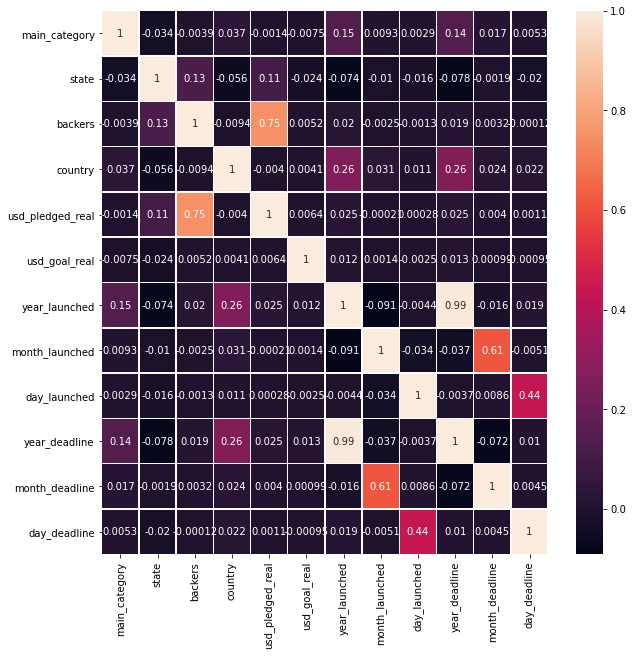

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)


What we can see in this heatmap, is that there appears to be relatively little correlation between most of the features. The main relations are:

main_category is somewhat correlated with year_launched and year_deadline, but not significantly (.15 and .14)

state is correlated with backers and with usd_pledged_real (.13 and .11)

backers bears a strong correlation with usd_pledged_real (.75)

country bears a correlation with year_launched and year_deadline (.26)

year_launched has a correlation with main_category, country, and a very strong correlation with year_deadline (.15, .26 and .99)

month_launched has a strong correlation with month_deadline (.61)

day_launched has a strong correlation with day_deadline (.44)

To answer our question, the most relevant data here is the correlation between state, backers and usd_pledged_real. let's explore this relationship further through some graphs.  


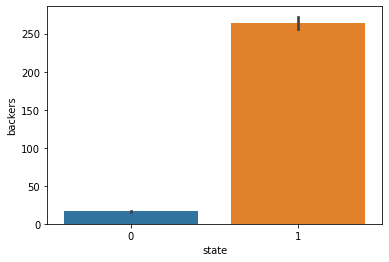

In [28]:
sns.barplot(x='state', y='backers', data=df)
plt.show()

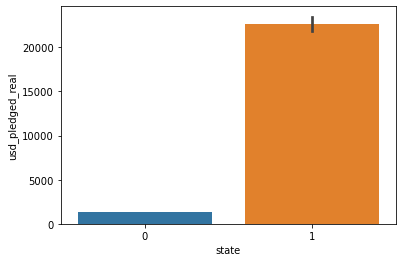

In [29]:
sns.barplot(x='state', y='usd_pledged_real', data=df)
plt.show()

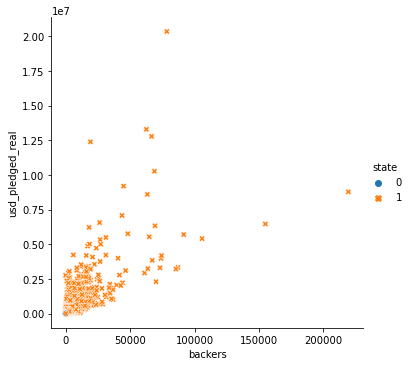

In [30]:
sns.relplot(data=df, x="backers", y="usd_pledged_real", hue="state", style="state")

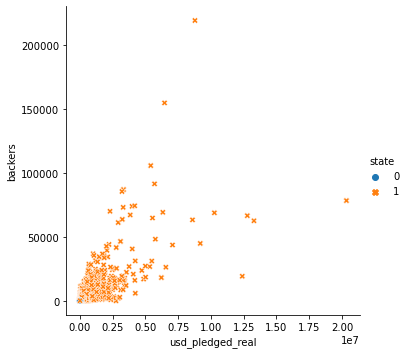

In [31]:
sns.relplot(data=df, x="usd_pledged_real", y="backers", hue="state", style="state")

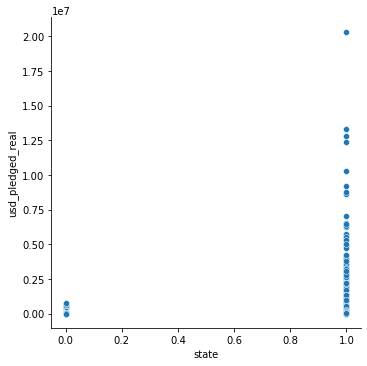

In [32]:
sns.relplot(data=df, x="state", y="usd_pledged_real")

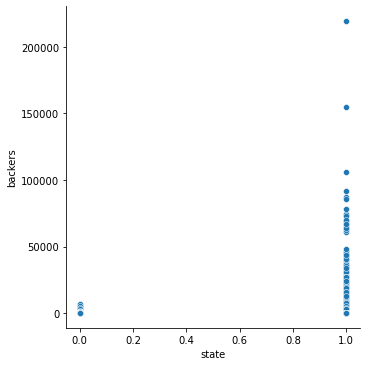

In [33]:
sns.relplot(data=df, x="state", y="backers")

The above graphs show us the very obvious relationship between backers and usd_pledged_real, and state. Most successful kickstarters had more backers and more pledged money, than the unsuccessful ones. 

Let's now use a decisiontree to confirm the relationship between backers, usd_pledged_real and state. 

score:0.9780960277379965


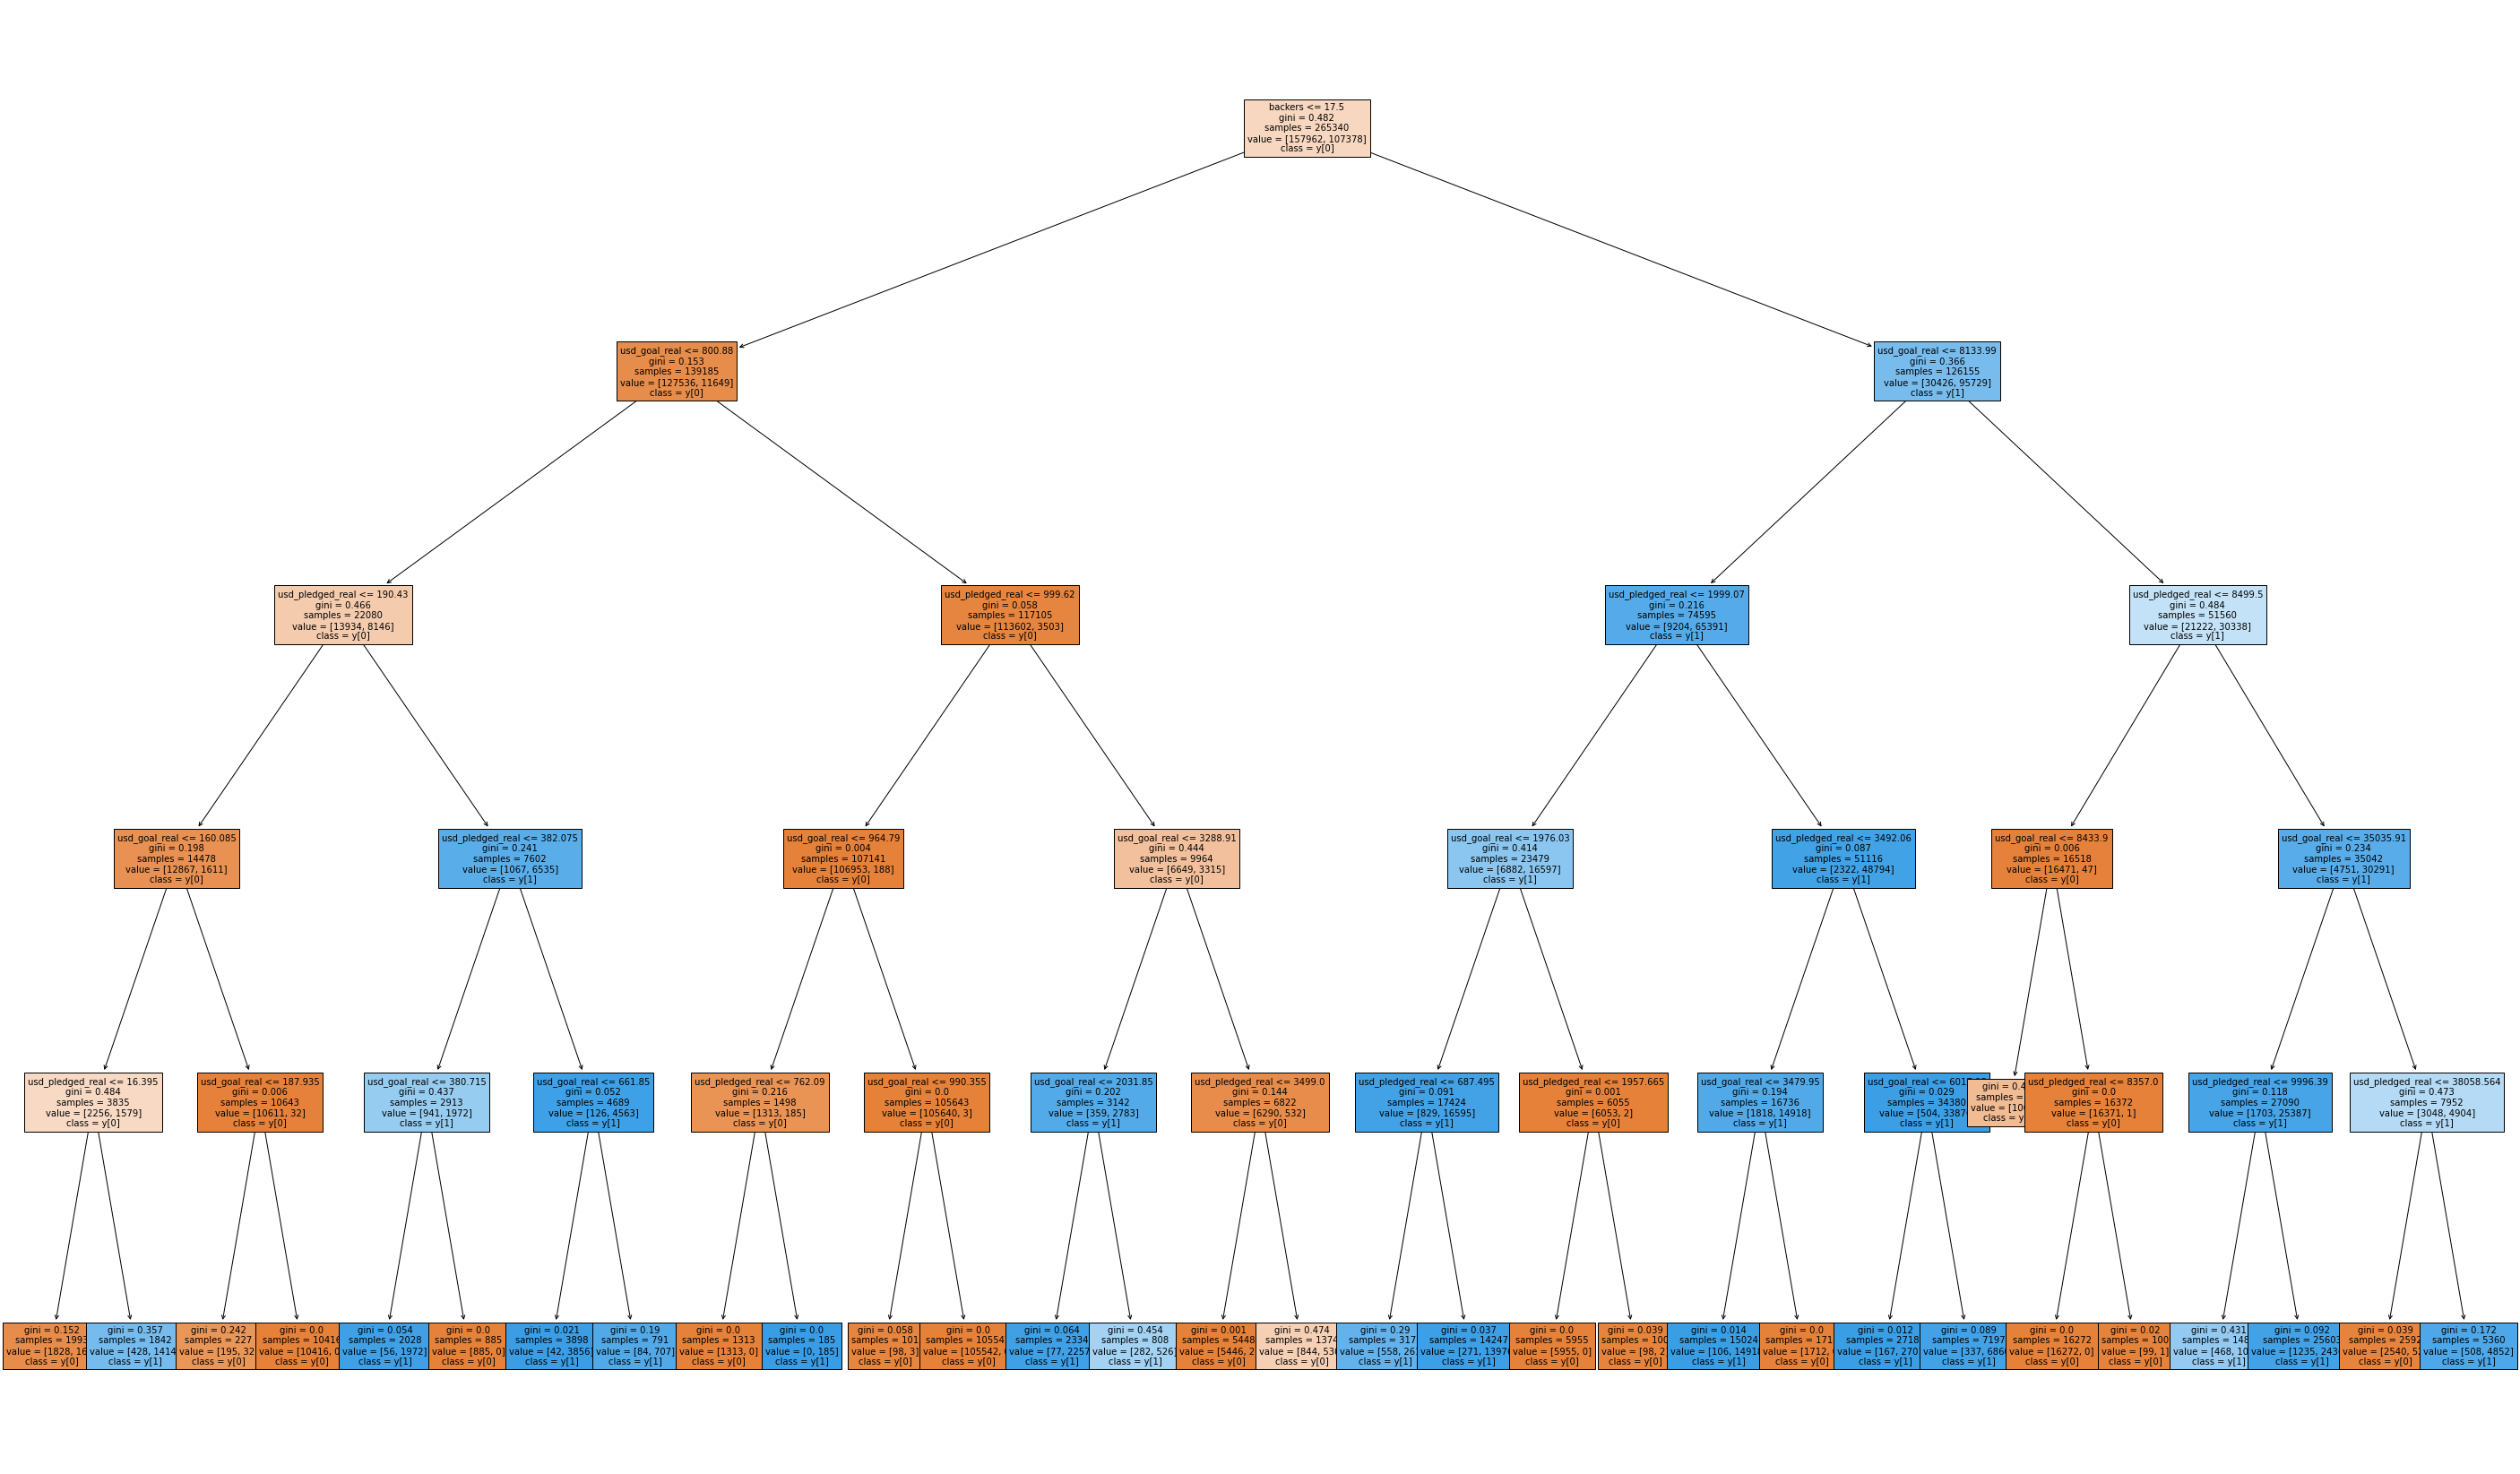

In [34]:
x = df[['main_category', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'year_launched', 'month_launched', 'day_launched', 'year_deadline', 'month_deadline', 'day_deadline']]
y = df['state']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

clf = tree.DecisionTreeClassifier(min_samples_leaf=100, max_depth=5)  
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))
fig, ax = plt.subplots(figsize=(50,30))
out = tree.plot_tree(clf, feature_names = x.columns, class_names = True, fontsize=10, filled=True)

With an accuracy of 98%, this decisiontree is incredible effective at predicting the possible success or failure of a kickstarter. to Give some examples:

- If a kickstarter has more than 17.5 backers, a usd_goal_real of below USD 8133 but above USD 3479, and with a usd_pledged_real of below USD 3492, than most likely the kickstarter will fail.

- If kickstarter has less than 17.5 backers, a usd_goal_real of less then USD 800 but more than USD 661, and the pledged money is more than USD 382, than the kickstarter is likely to succeed. 

What is interesting here, is that usd_goal_real also seems to play a significant factor in predicting the success of a kickstarter, a fact that was not reflected in the heatmap. For that reason, we will also use usd_goal_real as a feature to predict success or failure in subsequent models.

C:\Users\Cees Roffelson\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


score:0.9350569081178864


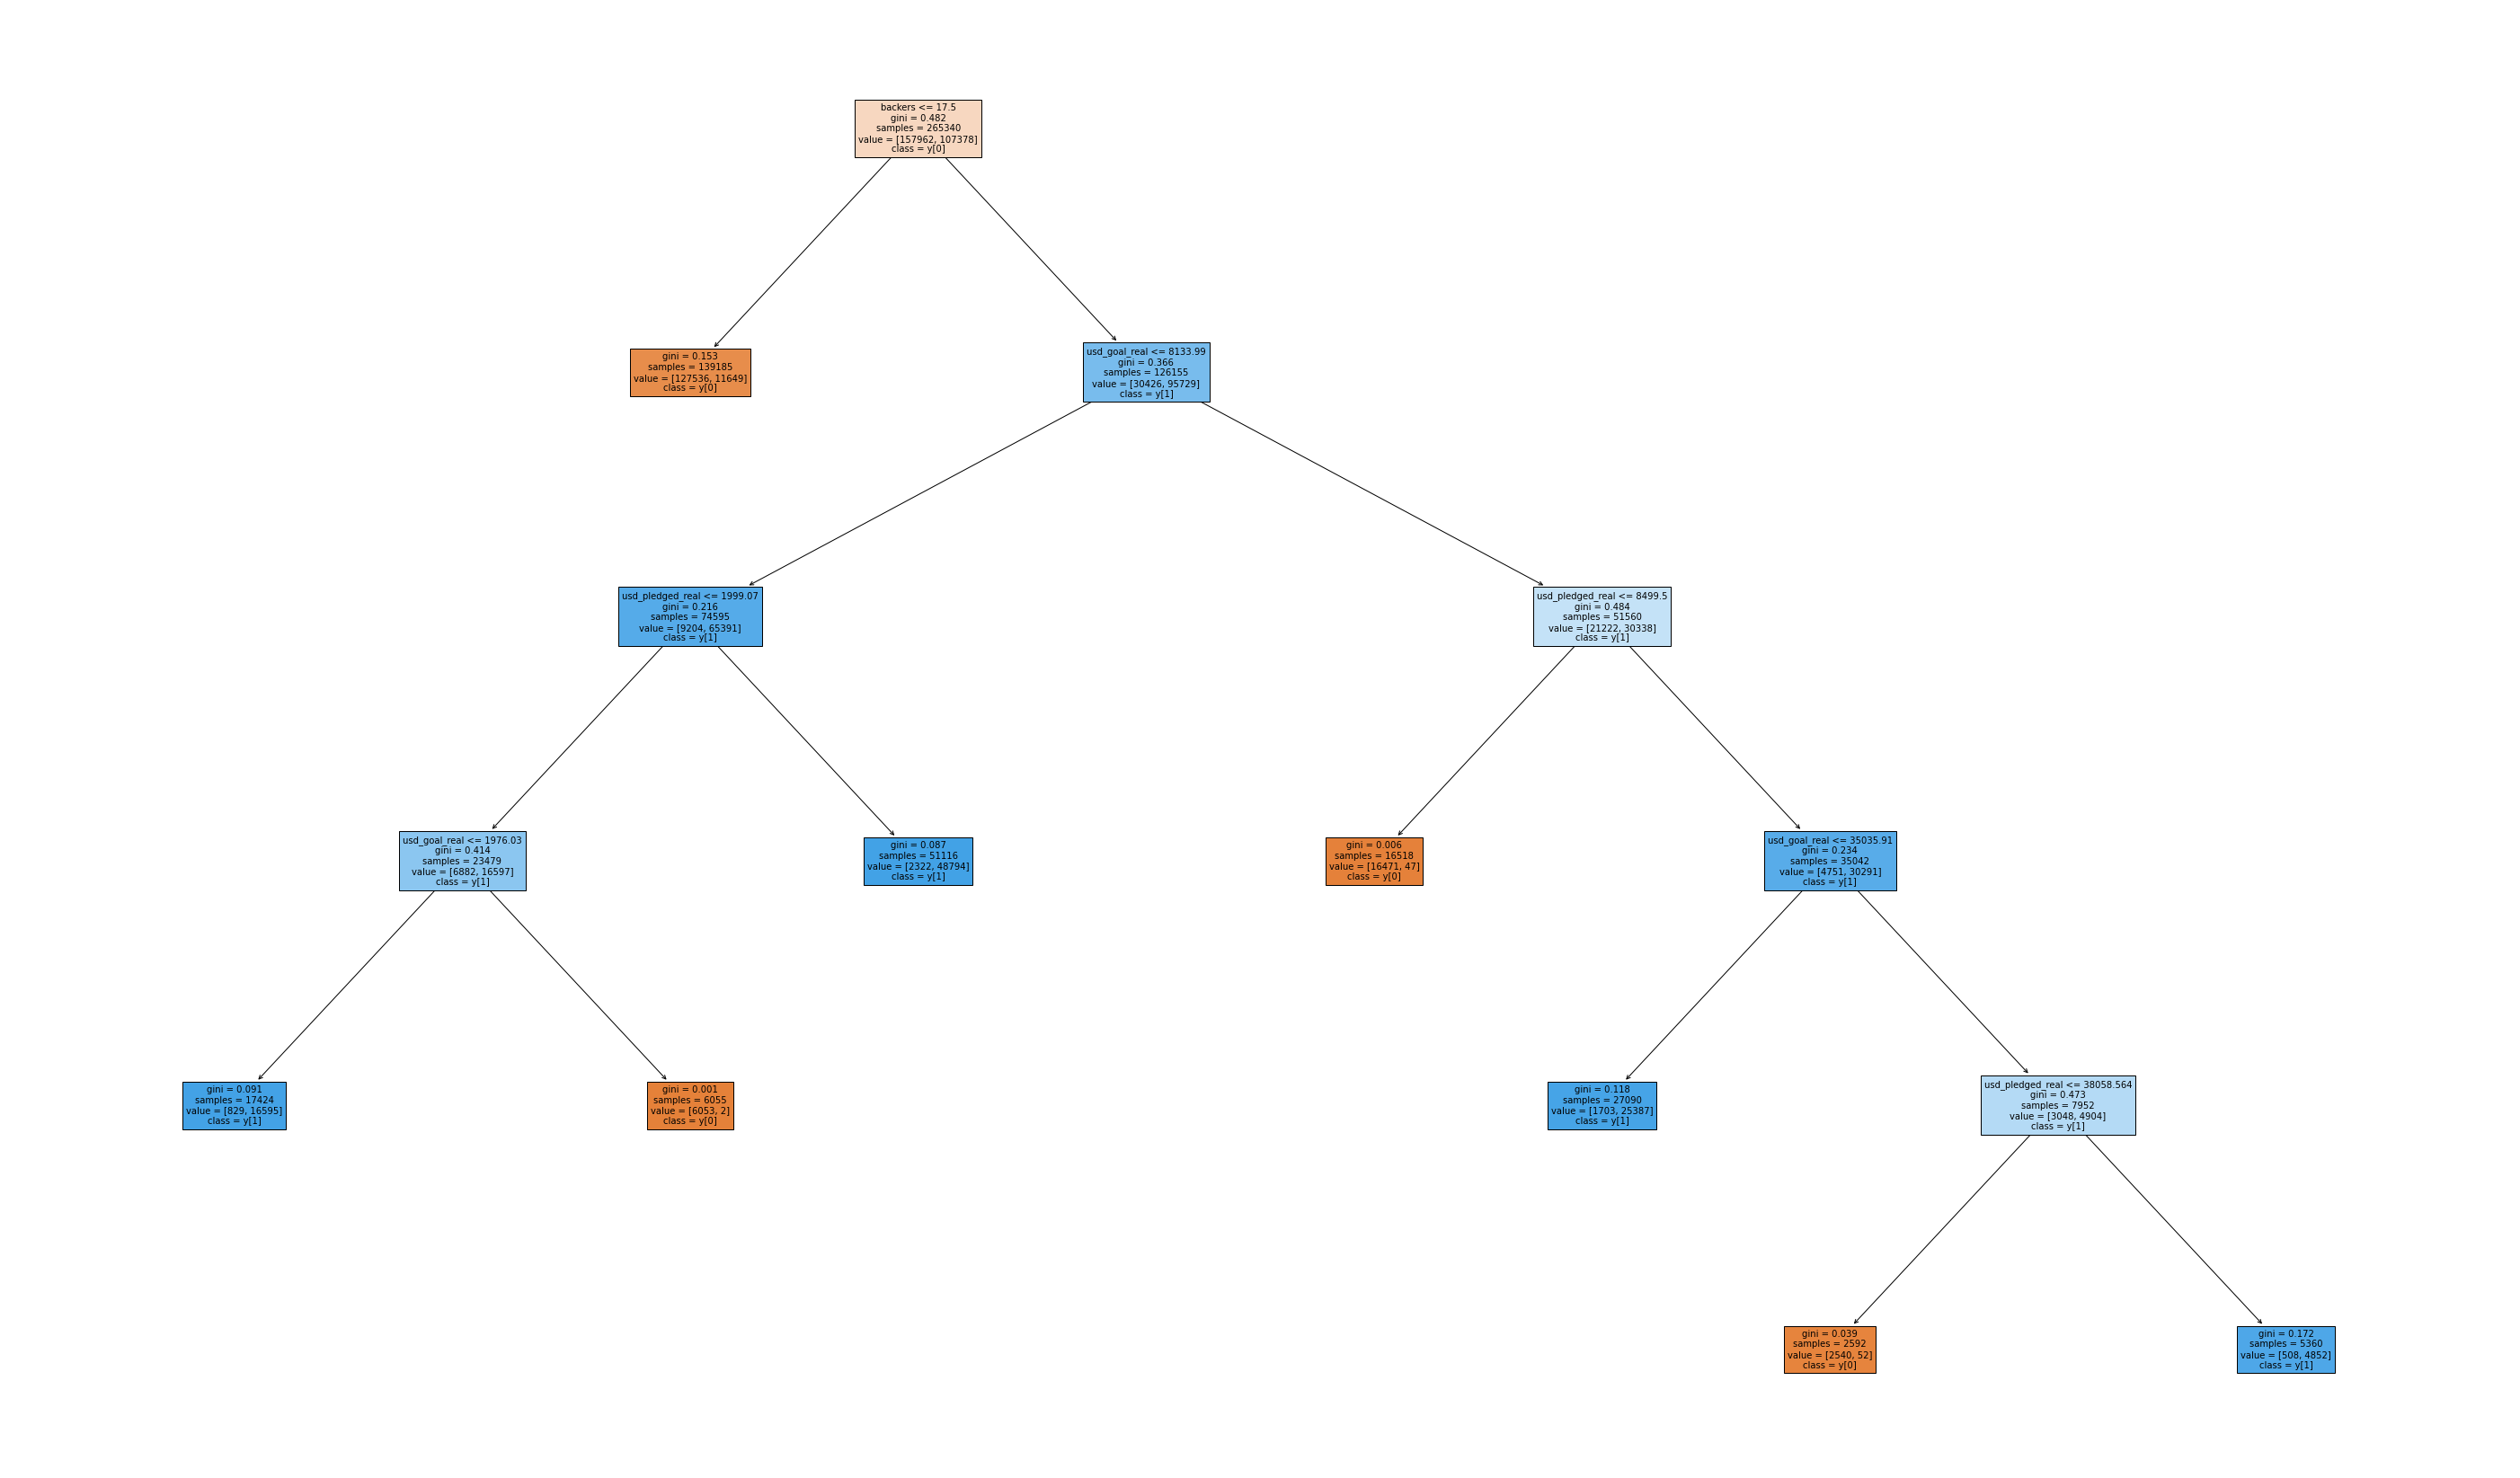

In [35]:
x = df[['main_category', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'year_launched', 'month_launched', 'day_launched', 'year_deadline', 'month_deadline', 'day_deadline']]
y = df['state']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

clf = tree.DecisionTreeClassifier(min_impurity_split=0.20)  
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))
fig, ax = plt.subplots(figsize=(50,30))
out = tree.plot_tree(clf, feature_names = x.columns, class_names = True, fontsize=10, filled=True)

score:0.9904575261928092


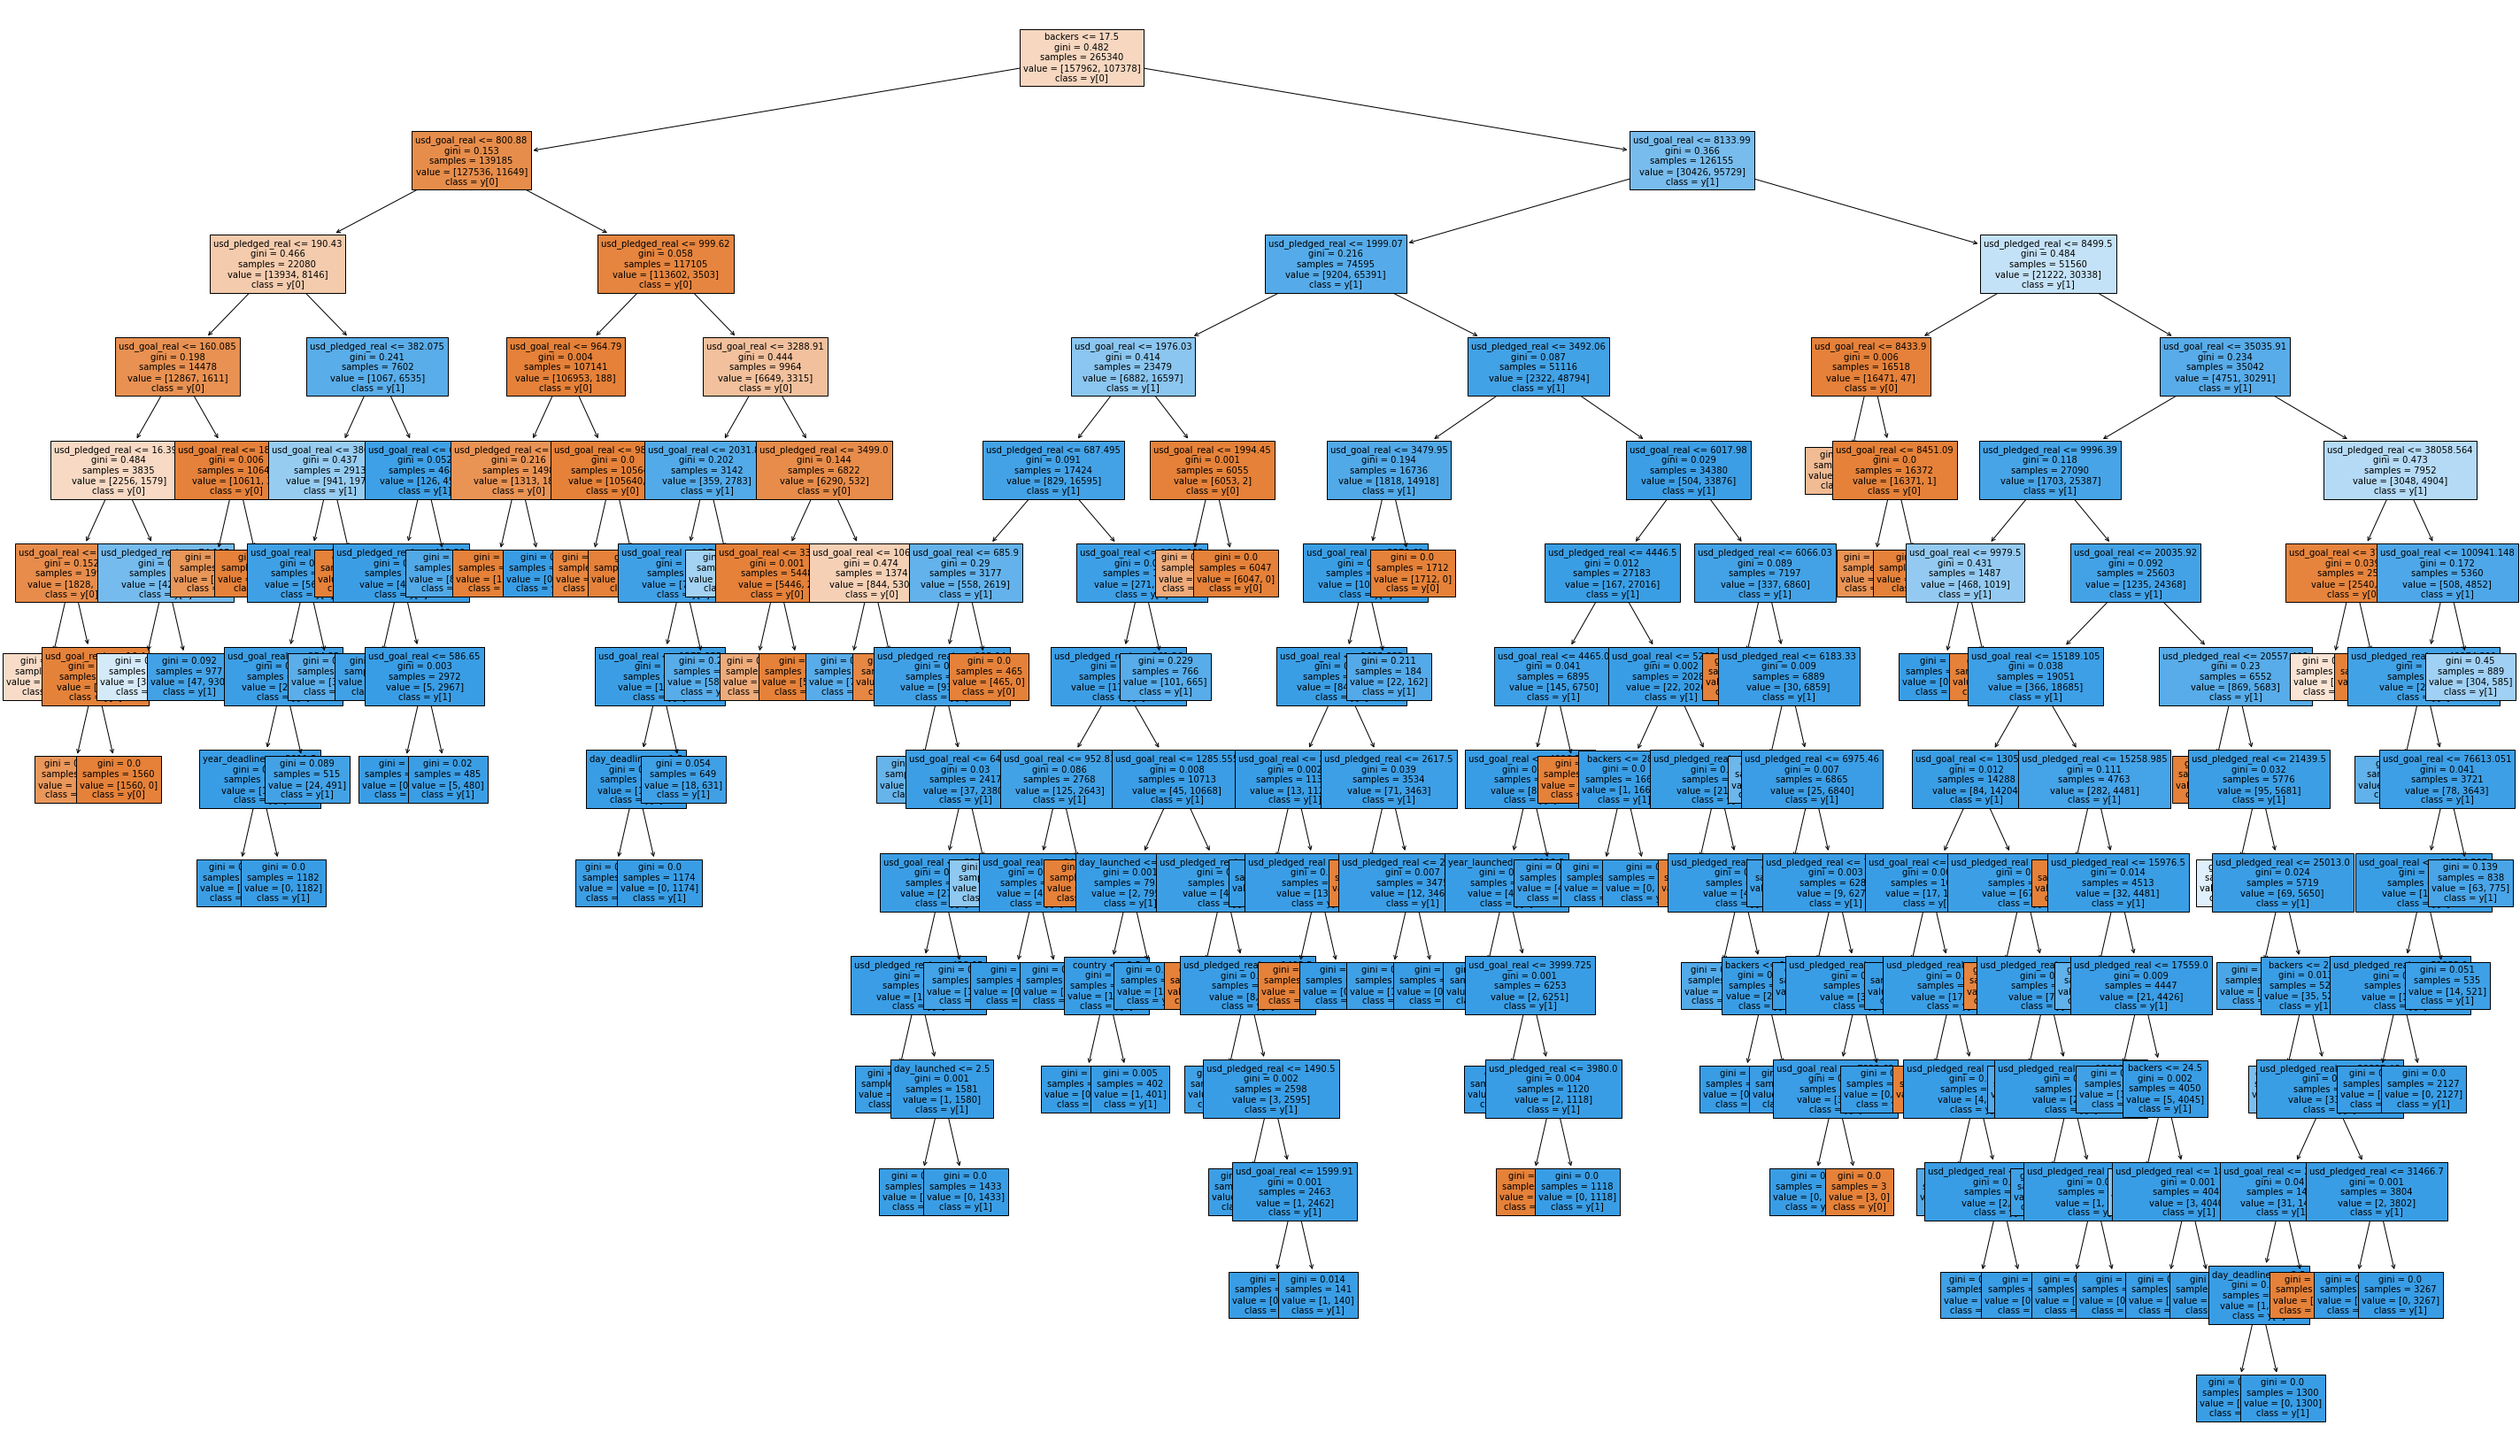

In [36]:
x = df[['main_category', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'year_launched', 'month_launched', 'day_launched', 'year_deadline', 'month_deadline', 'day_deadline']]
y = df['state']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

clf = tree.DecisionTreeClassifier(min_samples_split=1000)
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))
fig, ax = plt.subplots(figsize=(50,30))
out = tree.plot_tree(clf, feature_names = x.columns, class_names = True, fontsize=10, filled=True)

Even when we change the paramters, we maintain an increadibly high level of accuracy, and see that the same features returning.

In [37]:
x = df[['main_category', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'year_launched', 'month_launched', 'day_launched', 'year_deadline', 'month_deadline', 'day_deadline']]
y = df['state']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9960704702370783


Using RandomForestClassifier, we can predict the outcome of a kickstarter with a 99% certainty, using all the features, meaning our model will be able to predict the right outcome almost 100% of the time. 

In [38]:
x = df[['backers','usd_pledged_real', 'usd_goal_real']]
y = df['state']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9987739063143825


If we remove all the lesser important features (e.g. main_category, country, year_launched, etc.) we see almost no difference in accuracy, as the model is still able to predict success/failure with a 99% success rate. 

In [39]:
x = df[['main_category', 'country', 'year_launched', 'month_launched', 'day_launched', 'year_deadline', 'month_deadline', 'day_deadline']]
y = df['state']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5935499432177924


But if we do the oppositve, and remove the most important features (backers, usd_pledged_real, usd_goal_real) then we see a drastic reduction in the model's accuracy, as it goes down to 59%. This further confirms that backers, usd_pledged_real and usd_goal_real are the main determining features when it comes to the success or failure of a kickstarter.

In [40]:
x = df[['backers', 'usd_pledged_real', 'usd_goal_real']]
y = df['state']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=1.00


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

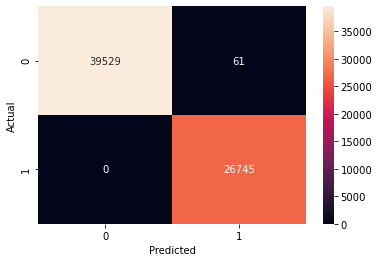

In [41]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, fmt = '.5g', annot=True)

Using logistic regression and a confusion matrix, we can see that our model is able to predict the success of a kickstarter, based on backers, usd_goal_real and usd_pledged_real, with 100% accuracy. Out of the 66,335 predictions, it got only 61 wrong (0.09%)

Accuracy=1.00 
0.9999865776952593


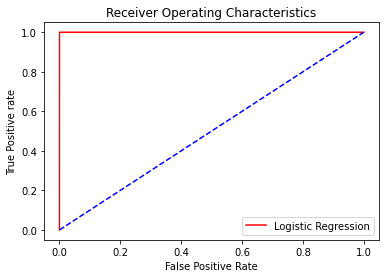

In [42]:
x = df[['backers', 'usd_pledged_real', 'usd_goal_real']]
y = df['state']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f} ".format(logreg.score(x_test, y_test)))
pred_probabilities = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.plot(rand_fpr, rand_tpr, linestyle='--', color='blue')
plt.title('Receiver Operating Characteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In the above graph, I have plotted results of the logistic regression. It still shows an accuracy of 100%, which is also illustrated by the 90 degrees angel of the logistic regression.

An AUC score of .99 indicates that this model will be correct 99% of the time with future predictions, indicating an incredibly high level of accuracy. Now let's scale the data and see what kind of effect that will have on the outcome.

Accuracy=0.90 
0.961813283765627


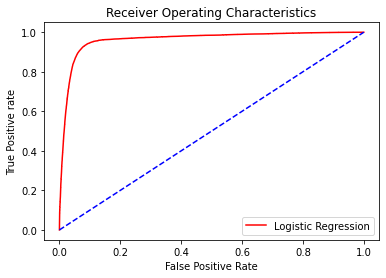

In [43]:
x = df[['backers', 'usd_goal_real']]
y = df['state']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f} ".format(logreg.score(x_test, y_test)))
pred_probabilities = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.plot(rand_fpr, rand_tpr, linestyle='--', color='blue')
plt.title('Receiver Operating Characteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

When we remove usd_pledged_real from our model, we see the accuracy drop to 90%, and the AUC score to .96. This indicates the model is still very accurate, though slightly less when all three features are used.

Accuracy=0.79 
0.9201586772928783


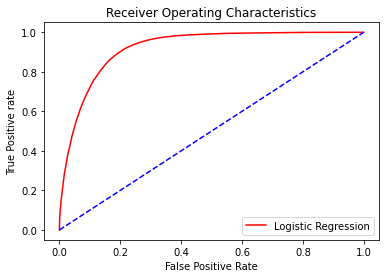

In [44]:
x = df[['backers']]
y = df['state']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f} ".format(logreg.score(x_test, y_test)))
pred_probabilities = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.plot(rand_fpr, rand_tpr, linestyle='--', color='blue')
plt.title('Receiver Operating Characteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

When we remove both usd_pledged_real and usd_goal_real from our model, accuracy drops to 79%, with an AUC Score of .92. Here we begin to see that relying on only one feature (in this case 'backers') does have a serious negative impact on our model's accuracy. 

Accuracy=0.60 
0.6302639897800841


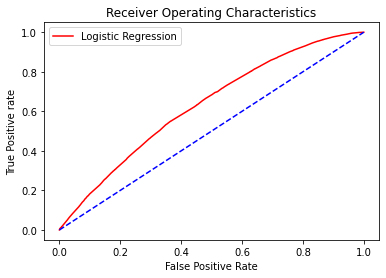

In [45]:
x = df[['usd_goal_real']]
y = df['state']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f} ".format(logreg.score(x_test, y_test)))
pred_probabilities = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.plot(rand_fpr, rand_tpr, linestyle='--', color='blue')
plt.title('Receiver Operating Characteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

This model shows us that relying only on usd_goal_real as a feature to predict success or failure, will create a highly inaccurate model that will only get it right 60% of the time.

Accuracy=0.77 
0.909905944228964


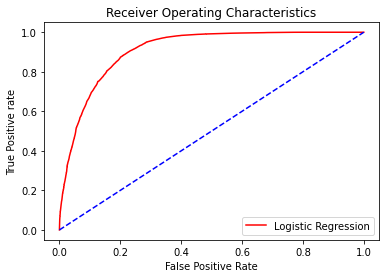

In [46]:
x = df[['usd_pledged_real']]
y = df['state']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f} ".format(logreg.score(x_test, y_test)))
pred_probabilities = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.plot(rand_fpr, rand_tpr, linestyle='--', color='blue')
plt.title('Receiver Operating Characteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Only relying on usd_pledged_real also does not create an accurate model, as this one will only get it right 77& of the time. 

Comparing the past 3 models, does show us that there is a hierarchy in the used features, where backers gives us the most accurate predictions, followed by usd_pledged_real, and that usd_goal_real gives us the least accurate predictions.

Accuracy=0.61


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

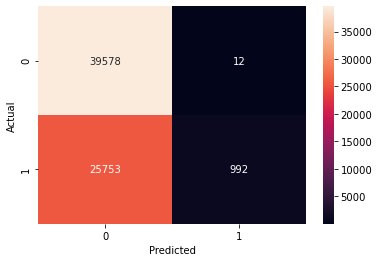

In [47]:
min_max_scaler = preprocessing.MinMaxScaler()
df[['backers','usd_pledged_real', 'usd_goal_real']] = min_max_scaler.fit_transform(df[['backers','usd_pledged_real', 'usd_goal_real']])
x = df[['backers', 'usd_pledged_real', 'usd_goal_real']]
y = df['state']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, fmt = '.5g', annot=True)

Accuracy=0.61 
0.9289201641559581


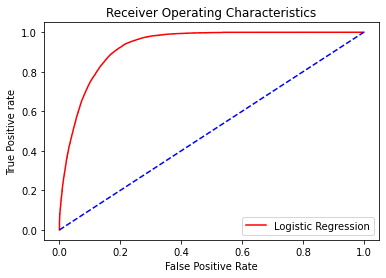

In [48]:
x = df[['backers', 'usd_pledged_real', 'usd_goal_real']]
y = df['state']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f} ".format(logreg.score(x_test, y_test)))
pred_probabilities = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.plot(rand_fpr, rand_tpr, linestyle='--', color='blue')
plt.title('Receiver Operating Characteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Here we see that scaling the data decreases the accuracy from 1.00 to .61, and that the AUC score drops to .92. This makes it clear that scaling the data does not positively influence the accuracy of our model.  

Our research so far has shown that the main_category and country features had little effect on the potential success of a kickstarter. Let's explore that a bit more by seeing if we can discover associations between category, country, and state.

In [49]:
df2 = pd.read_csv("Kickstart Database.csv")
df2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52,35.0,successful,3,US,35.0,35.0,20.0
1,2089078683,New York Makes a Book!!,Journalism,Journalism,USD,2009-05-16,3000.0,2009-04-28 13:55,3329.0,successful,110,US,3329.0,3329.0,3000.0
2,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,USD,2009-05-16,300.0,2009-04-29 5:26,15.0,failed,2,US,15.0,15.0,300.0
3,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,USD,2009-05-20,300.0,2009-04-30 22:10,40.0,failed,4,US,40.0,40.0,300.0
4,199916122,Mr. Squiggles,Illustration,Art,USD,2009-05-22,30.0,2009-05-12 23:39,0.0,failed,0,US,0.0,0.0,30.0


In [50]:
main_category_one_hot = pd.get_dummies(df2['main_category'])
df2 = df2.join(main_category_one_hot)
state_one_hot = pd.get_dummies(df2['state'])
df2 = df2.join(state_one_hot)
country_one_hot = pd.get_dummies(df2['country'])
df2 = df2.join(country_one_hot)
df2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
0,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52,35.0,successful,...,0,0,0,0,0,0,0,0,0,1
1,2089078683,New York Makes a Book!!,Journalism,Journalism,USD,2009-05-16,3000.0,2009-04-28 13:55,3329.0,successful,...,0,0,0,0,0,0,0,0,0,1
2,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,USD,2009-05-16,300.0,2009-04-29 5:26,15.0,failed,...,0,0,0,0,0,0,0,0,0,1
3,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,USD,2009-05-20,300.0,2009-04-30 22:10,40.0,failed,...,0,0,0,0,0,0,0,0,0,1
4,199916122,Mr. Squiggles,Illustration,Art,USD,2009-05-22,30.0,2009-05-12 23:39,0.0,failed,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df2 = df2.drop(['ID', 'name', 'goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 
'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country'], axis = 1)
df2.head()

,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,...,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
frequent_itemsets=apriori(df2, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.074349,(Art)
1,0.028572,(Comics)
2,0.023264,(Crafts)
3,0.079411,(Design)
4,0.060254,(Fashion)
...,...,...
92,0.049416,"(failed, US, Publishing)"
93,0.026316,"(US, successful, Publishing)"
94,0.035216,"(failed, US, Technology)"
95,0.012473,"(US, successful, Technology)"


In [53]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Art),(US),0.074349,0.772794,0.058921,0.792491,1.025488,0.001464,1.094921
1,(Comics),(US),0.028572,0.772794,0.023530,0.823551,1.065680,0.001450,1.287659
2,(Crafts),(failed),0.023264,0.522153,0.015061,0.647406,1.239878,0.002914,1.355233
3,(Crafts),(US),0.023264,0.772794,0.017557,0.754683,0.976564,-0.000421,0.926171
4,(Design),(US),0.079411,0.772794,0.057281,0.721317,0.933388,-0.004088,0.815284
5,(Fashion),(failed),0.060254,0.522153,0.037453,0.621581,1.190420,0.005991,1.262747
6,(Fashion),(US),0.060254,0.772794,0.043796,0.726858,0.940559,-0.002768,0.831824
7,(Film & Video),(US),0.167921,0.772794,0.137120,0.816576,1.056654,0.007352,1.238694
8,(Food),(failed),0.064971,0.522153,0.042172,0.649094,1.243110,0.008247,1.361750
9,(Food),(US),0.064971,0.772794,0.052662,0.810544,1.048848,0.002453,1.199253


In [54]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Comics),(successful),0.028572,0.353762,0.015428,0.539976,1.526381,0.005320,1.404791
1,(successful),(Comics),0.353762,0.028572,0.015428,0.043611,1.526381,0.005320,1.015725
2,(failed),(Crafts),0.522153,0.023264,0.015061,0.028844,1.239878,0.002914,1.005746
3,(Crafts),(failed),0.023264,0.522153,0.015061,0.647406,1.239878,0.002914,1.355233
4,(canceled),(Design),0.102411,0.079411,0.010965,0.107068,1.348273,0.002832,1.030973
5,(Design),(canceled),0.079411,0.102411,0.010965,0.138078,1.348273,0.002832,1.041381
6,(failed),(Food),0.522153,0.064971,0.042172,0.080766,1.243110,0.008247,1.017183
7,(Food),(failed),0.064971,0.522153,0.042172,0.649094,1.243110,0.008247,1.361750
8,(Games),(canceled),0.093041,0.102411,0.016379,0.176038,1.718940,0.006850,1.089358
9,(canceled),(Games),0.102411,0.093041,0.016379,0.159932,1.718940,0.006850,1.079626


There are some interesting conclusions to be drawn from the results above:
- Almost all the kickstarters originate from the US, and a few from Great Britain.
- The high lift shows us that the kickstarter categories Comics, Music, Theater, and Art are often associated with success.
- The high lift shows us that the kickstarter categories Crafts, Food, Technology, Fashion are often associated with failure.
- The above results are confirmed, when we see that Crafts, Fashion, Food, Technology features often come with failure, with a confidence of atleast 0.6. 


Given the research that has been done, I can now answer the questions that were asked at the beginning: 
- What are the main factors that contribute to a kickstarter's success or failure?
- Can we predit whether a kickstarter will succeed or fail?

With the models we have created, we can definitely answer the above questions:

- The success of a kickstarter is mainly determined by the number of backers, the amount of money that was pledged to the kickstarter, and the pledge goal of the kickstarter. The the more backers and money there was, the more likely a kickstarter would succeed. The higher the pledged goal was, the less likely it would succeed. 

- On the basis of backers, usd_pledged_real and usd_pledged_goal, we can predict with almost 100% certainty whether a kickstarter will succeed or fail. 

- A kickstarter that focusses on Comics, Music, Theater or Art is more likely to succeed, whereas a kickstarter that focusses on Crafts, Fahsion, Food and Technology is more likely to fail.